**CHANDRACHUD MALALI GOWDA**

Spring 2022

CS 25X: Data Analysis and Visualization

Project 2: Matrix Transformations

In [1]:
%pip install palettable
%pip install --upgrade pip 
%pip install numpy
%pip install matplotlib
%pip install pandas

import numpy as np
import matplotlib.pyplot as plt

from data import Data
from transformation import Transformation

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20, 'figure.figsize': (4, 4)})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_38109/3333944570.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
/var/folders/10/n4knghmx6ks_bqbcwt45r8k00000gn/T/ipykernel_38109/3333944570.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])


# Project 2: Matrix Transformations

The goal of this project is to give you practice using matrix multiplication to efficiently transform data (translation, scaling, and rotation). To that end, you'll develop the Transformation class as a child class of Analysis, from Project 1. 

We expect you to create the transformation matrices and and apply them from data using matrix multiplication yourself — **you may not call high-level functions to do all the work for you**. Functions similar to the following are fine to use:

- creating an identity matrix with `np.eye()`
- creating matrices of zeros or ones with `np.zeros()` or `np.ones()`
- concatenating matrices with `np.hstack()` or `np.vstack()`

Here is an **overview** of Transformation class's methods in transformation.py (use tasks below to guide you through the implementation):
1. `__init__()`: The constructor.
1. `get_data_homogeneous()`: Adds a column of normal homogeneous coordinates to the data matrix.
2. `project()`: Projects the M-dimensional Data object in self.data onto a subset of its axes.
3. Construct homogeneous transformation matrices (in any order):
> * `translation_matrix()`: Constructs an M+1-by-M+1 translation matrix for shifting the M-dimensional Data object in self.data
> * `scale_matrix()`: Constructs an M+1-by-M+1 scale matrix for resizing the M-dimensional Data object in self.data
> * `rotation_matrix_3d()`: Constructs a 4x4 rotation matrix for rotating the 3-dimensional Data object in self.data
4. Apply transformation matrices to the Data object in self.data (with homogeneous coordinates):
> * `translate()`: Uses a translation matrix to transform self.data
> * `scale()`: Uses a scale matrix to transform self.data
> * `rotate_3d()`: Uses a 3D rotation matrix to transform self.data (which must, in this case, contain exactly 3 features, plus the normal homogeneous coordinate)
> * `transform()`: Uses a homogeneous transformation matrix (passed as a parameter) to transform self.data.
5. Normalization:
> * `normalize_together()`: Uses homogeneous transformation matrices to normalize all the features of self.data together, using the global min and max.
> * `normalize_separately()`: Uses homogeneous transformation matrices to normalize each feaure separately, using its own local min and max.
6. Visualization:
> * `scatter_color()`: Similar to Analysis.scatter(), but using a third feature to control the color of the plotted data points.
> * `heatmap()`: This function is provided for you, already completed. Take a look to see what it's doing.

Use this notebook to demo your completed Transformation class (transformation.py).

## Task 0) Preprocess Iris data

- Copy over `data.py`, `analysis.py`, and `iris.csv` from Project 1.
- In whatever way you wish, replace the `species` strings with ints — i.e. setosa -> 0, versicolor -> 1, virginica -> 2. *Remember to change the type to numeric!*

## Task 1) Visualizing multi-dimensional data (>3D) with color scales

The Iris dataset has too many dimensions to visualize in 2D space with a standard scatterplot! Let's see what we can do about that.

In this task, you will use color to visualize a third dimension of the Iris dataset. Your color scale should be colorblind friendly.

- Implement the `scatter_color()` method to your `Transformation` class that uses color to represent a third axis on a 2D scatterplot.
    - Use a ColorBrewer color palette to implement the color scale (e.g. from the `palettable` library).
    - To do so, go to https://jiffyclub.github.io/palettable/colorbrewer/, and examine maps in the 3 categories (diverging, qualitative, and sequential) to find the appropriate map. Access via the naming scheme below. The map has an attribute named mpl_colormap that can be passed in to `scatter` to control the colors (as the value for the cmap parameter). We use the third feature (which we are calling Z here) to determine which values of the color map are used for which data points. We can also control the outline of the points with the edgecolor argument (here we make it black).
            color_map = palettable.colorbrewer.sequential.Purples_9
            scatter(X, Y, c=Z, s=75, cmap=color_map.mpl_colormap, edgecolor='black')
- Use your `scatter_color()` method to recreate the images below.
    * One with headers [`sepal_length`, `petal_length`, `sepal_width`].
    * Another with headers [`sepal_length`, `petal_length`, `species`].

**Reminder:** Re-project your data onto the appropriate variables before creating each plot.

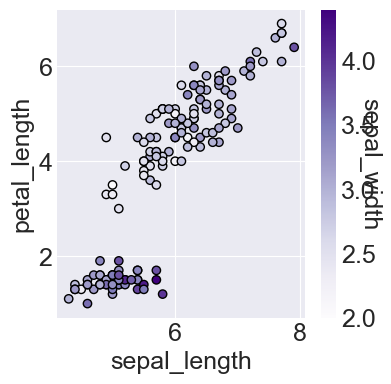

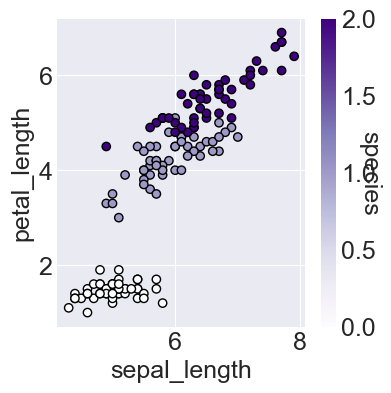

In [2]:
# Task 0

import numpy as np
import matplotlib.pyplot as plt

from data import Data
from transformation import Transformation

import pandas as pd

# load the iris dataset from the CSV file
iris_df = pd.read_csv('iris.csv')

# create a dictionary to map the species names to integers
species_map = {'setosa': 0, 'versicolor': 1, 'virginica': 2}

# replace the species names with integers in the 'species' column
iris_df['species'] = iris_df['species'].map(species_map)

# Modifying the 2nd line of the iris.csv file to have the species as integers i.e. setosa -> 0, versicolor -> 1, virginica -> 2
iris_df.iloc[0, 4] = 'numeric'

# write the updated dataframe to a new CSV file with the extra column
iris_df.to_csv('iris_with_ints.csv', index=False)

# Task 1

# Load the iris dataset with the `iris_with_ints.csv` file.
data = Data('iris_with_ints.csv')

# Use your `scatter_color()` method to recreate the images below.
#     * One with headers [`sepal_length`, `petal_length`, `sepal_width`].
#     * Another with headers [`sepal_length`, `petal_length`, `species`].

# Importing the transformation.py file
from transformation import Transformation

# Task 2

# Create a `Transformation` object with the `iris_with_ints.csv` file.
transformation = Transformation(orig_dataset=data)

# Project the data with the headers [`sepal_length`, `petal_length`, `sepal_width`].
transformation.project(['sepal_length', 'petal_length', 'sepal_width'])

# Use your `scatter_color()` method to recreate the images below.
#     * One with headers [`sepal_length`, `petal_length`, `sepal_width`].
#     * Another with headers [`sepal_length`, `petal_length`, `species`].
transformation.scatter_color(ind_var='sepal_length', dep_var='petal_length', c_var='sepal_width')

# Project the data with the headers [`sepal_length`, `petal_length`, `species`].
transformation.project(['sepal_length', 'petal_length', 'species'])
transformation.scatter_color(ind_var='sepal_length', dep_var='petal_length', c_var='species')


#### Your results should look like the following

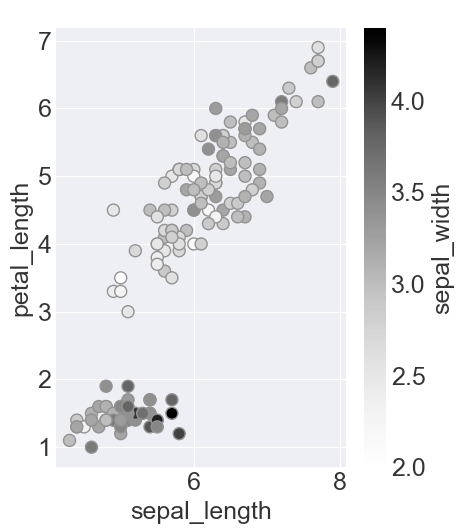

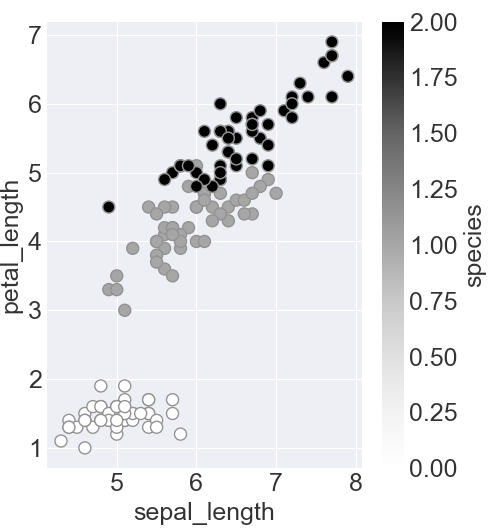

**Question 1:** In a scatterplot, is color a more useful representation of __continuous__ features (like sepal width) or __discrete__ features (like species)? Why do you think that is?

**Answer 1:**  

Color is a more useful representation of discrete features (like species) in a scatterplot, rather than continuous features (like sepal width).

The reason is that color can be used to visually distinguish between different categories or groups, whereas for continuous features, using color may not be as effective since it would require dividing the feature into distinct categories, which could potentially lead to loss of information or misinterpretation of the data.

For example, in a scatterplot of sepal length versus sepal width for different species of flowers, we could use different colors to represent each species. This would allow us to easily differentiate between the different groups and see any patterns or trends in the data based on species. However, if we were to use color to represent sepal width values themselves, we would need to decide on distinct categories or intervals, which could be arbitrary and potentially mask the true nature of the data.

## Task 2) Implement transformation matrices

Implement the following methods in `transformation.py`, running the following test code to guide you as you work. 
- Constructor
- `project(headers)`: "project" the data on the list of data variables specified by `headers` — i.e. select a subset of the variables from the original dataset.
- `get_data_homogeneous`: Helper method to get a version of the projected data array with an added homogeneous coordinate.
- `translation_matrix(magnitudes)`: Make an M-dimensional homogeneous transformation matrix for translation
- `scale_matrix(magnitudes)`: Make an M-dimensional homogeneous scaling matrix for scaling.

### Test (i): Translation

Write test code in the cell below that does the following. Note the below expected output.

* Create Data and Transformation objects for the Iris dataset. 
* Project the Transformation object's data onto the first 3 axes (`sepal_length`, `sepal_width`, and `petal_length`).
* Create a translation matrix that would shift the projected data by -0.5 along `sepal_length` and +1.5 along `petal_length`, then print the translation matrix. 

In [3]:
# Your test code here

# Task 2 - i

# Create a data and transformation object with the `iris_with_ints.csv` file.
data = Data('iris_with_ints.csv')
transformation = Transformation(orig_dataset=data)

# Project the data with the headers [`sepal_length`, `petal_length`, `sepal_width`].
transformation.project(['sepal_length', 'petal_length', 'sepal_width'])

# Create a translation matrix that would shift the projected data by -0.5 along 'sepal_length' and +1.5 along 'petal_length' and then print the translation matrix.
transformation.translation_matrix([-0.5, 0, 1.5])

array([[ 1. ,  0. ,  0. , -0.5],
       [ 0. ,  1. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ,  1.5],
       [ 0. ,  0. ,  0. ,  1. ]])

**Your output should look like:**

    Translation matrix:
    [[ 1.   0.   0.  -0.5]
     [ 0.   1.   0.   0. ]
     [ 0.   0.   1.   1.5]
     [ 0.   0.   0.   1. ]]

### Test (ii): Scaling

* Create a scaling matrix that would scale the projected data by 2 along `sepal_width` and 1/3 along `petal_length`, then print the scaling matrix.

In [4]:
# Your test code here

# Task 2 - ii

# Create a scaling matrix that would scale the projected data by 2 along 'sepal_width' and 1/3 along 'petal_length' and then print the scaling matrix.
transformation.scale_matrix([1, 2, 1/3])

array([[1.     , 0.     , 0.     , 0.     ],
       [0.     , 2.     , 0.     , 0.     ],
       [0.     , 0.     , 0.33333, 0.     ],
       [0.     , 0.     , 0.     , 1.     ]])

**Your output should look like:**

    Scale matrix:
    [[1.      0.      0.      0.     ]
     [0.      2.      0.      0.     ]
     [0.      0.      0.33333 0.     ]
     [0.      0.      0.      1.     ]]

## Task 3) Transformation Detective

The objective of this task is to determine the set of matrix transformations to apply to the specified data and what variables to project onto in order to reproduce the below plots.

### 3a) Hello, Iris

- Create Data and Transformation objects for the Iris dataset.
- Project the dataset onto all the headers.
- Use the Transfromation object to generate a pair plot of the entire Iris dataset. (*Your results should look just like the example, below.*)

(<Figure size 1200x1200 with 25 Axes>,
 array([[<Axes: ylabel='sepal_length'>, <Axes: >, <Axes: >, <Axes: >,
         <Axes: >],
        [<Axes: ylabel='petal_length'>, <Axes: >, <Axes: >, <Axes: >,
         <Axes: >],
        [<Axes: ylabel='sepal_width'>, <Axes: >, <Axes: >, <Axes: >,
         <Axes: >],
        [<Axes: ylabel='petal_width'>, <Axes: >, <Axes: >, <Axes: >,
         <Axes: >],
        [<Axes: xlabel='sepal_length', ylabel='species'>,
         <Axes: xlabel='petal_length'>, <Axes: xlabel='sepal_width'>,
         <Axes: xlabel='petal_width'>, <Axes: xlabel='species'>]],
       dtype=object))

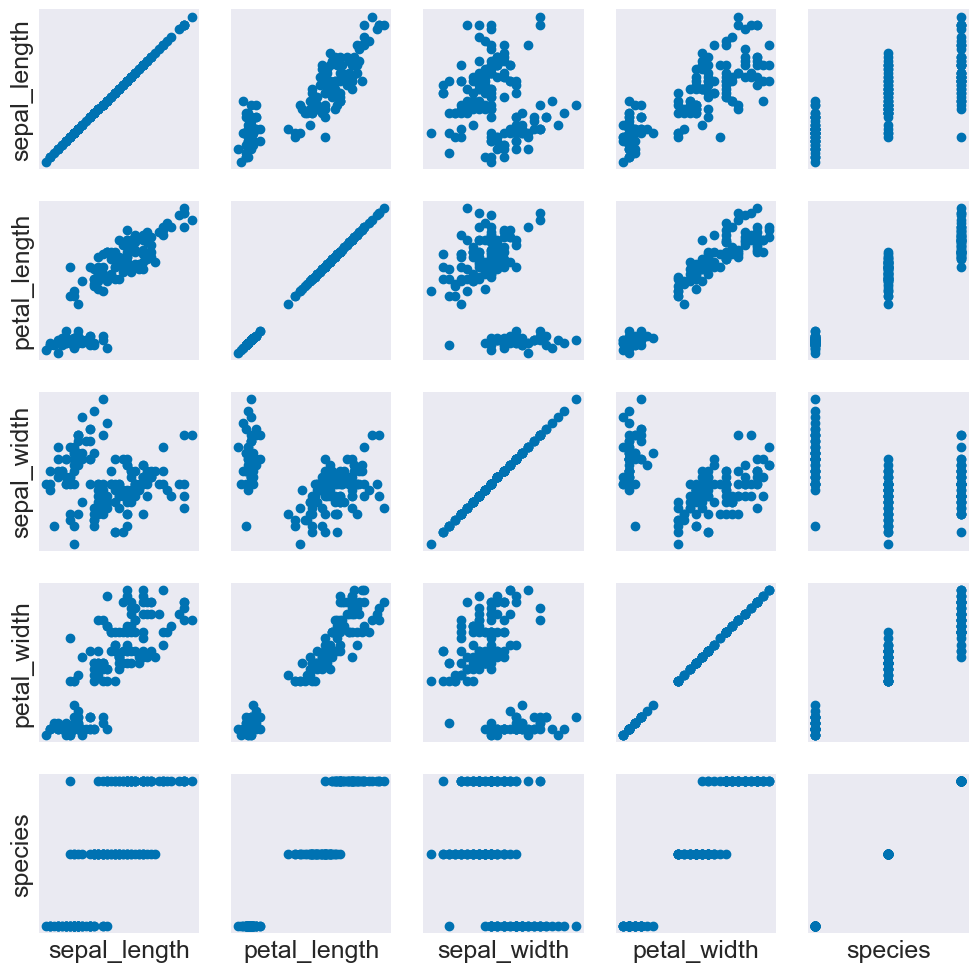

In [5]:
# Your code here

# Task 3 - a

# Create a data and transformation object with the `iris_with_ints.csv` file.
data = Data('iris_with_ints.csv')
transformation = Transformation(orig_dataset=data)

# projet the data onto all the headers.
transformation.project(['sepal_length', 'petal_length', 'sepal_width', 'petal_width', 'species'])

# Generating a pair plot of the entire dataset with analysis.py
from analysis import Analysis

data_an = Analysis(transformation.orig_dataset)
data_an.pair_plot(data_vars = ['sepal_length', 'petal_length', 'sepal_width', 'petal_width', 'species'])




#### Your results should look like the image below.

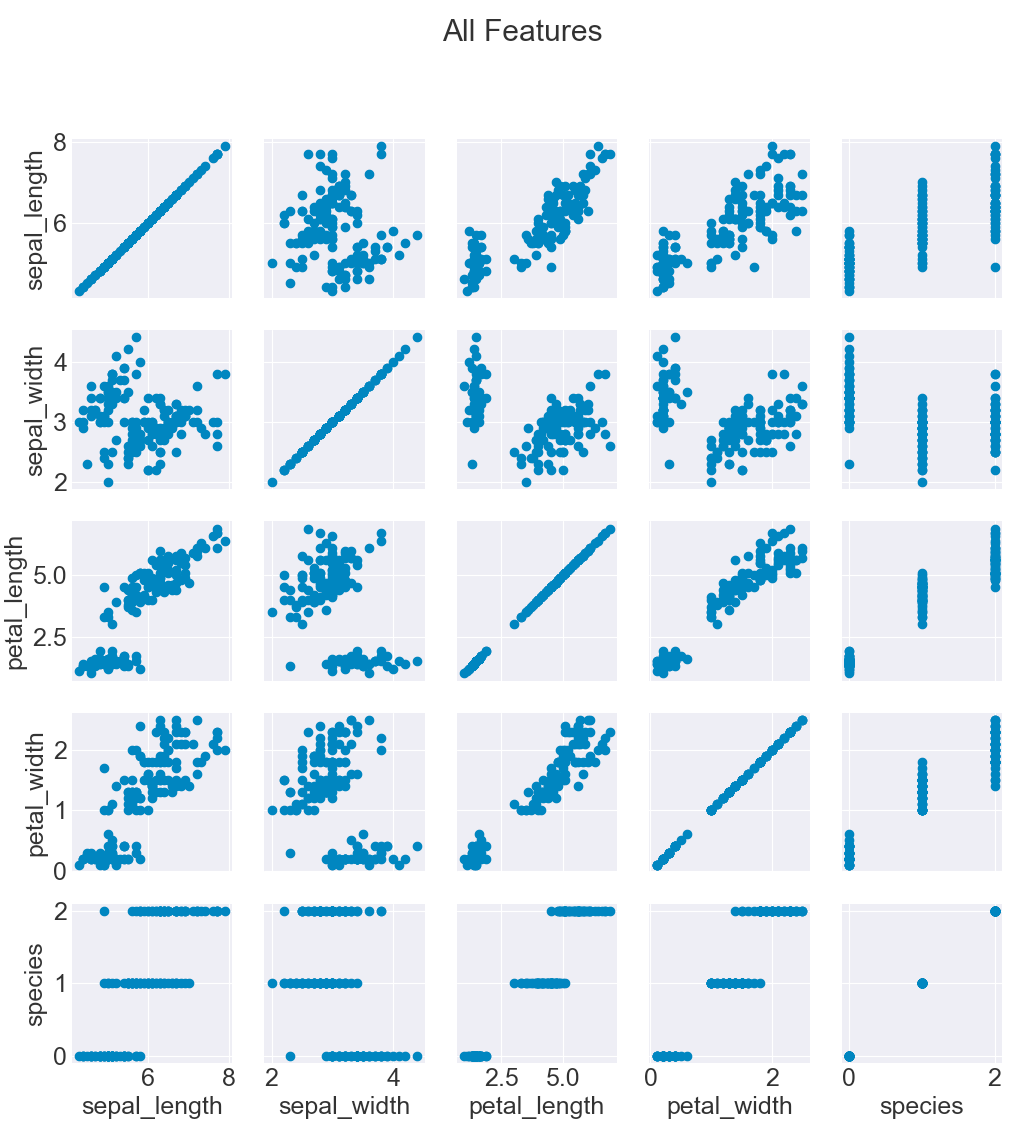

**Question 2:** How many dimensions (features) does the Iris dataset contain?

4 dimensions

**Answer 2:** 

### 3b) Solve transformation mystery 1

- Make a Transformation object.
- Determine the set of variables to project onto to recreate the image below.
- Create a pair plot identical to the one below based on the projected data.

(<Figure size 1200x1200 with 9 Axes>,
 array([[<Axes: ylabel='sepal_length'>, <Axes: >, <Axes: >],
        [<Axes: ylabel='petal_length'>, <Axes: >, <Axes: >],
        [<Axes: xlabel='sepal_length', ylabel='petal_width'>,
         <Axes: xlabel='petal_length'>, <Axes: xlabel='petal_width'>]],
       dtype=object))

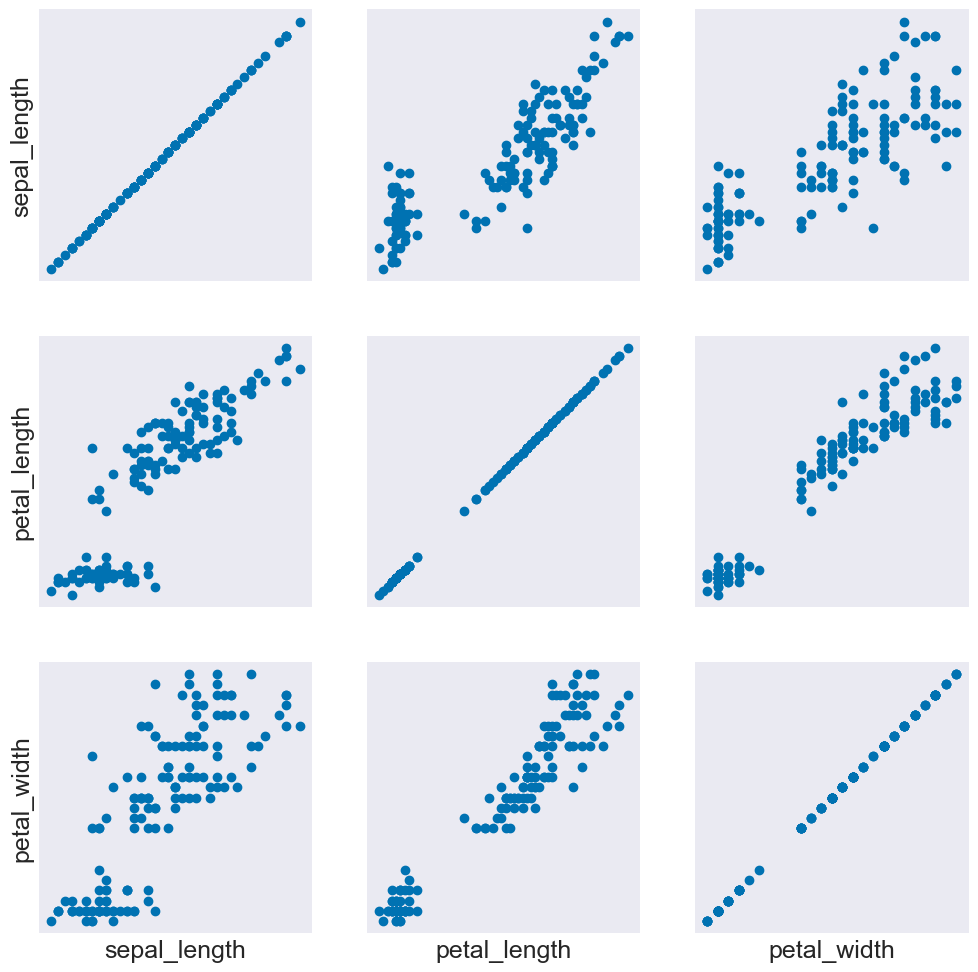

In [6]:
# Your code here

# Making a transformation object with the iris_with_ints.csv file
transformation = Transformation(orig_dataset=data)

# Projecting the trasnfomation object onto the headers sepal_length, petal_length, petal_width
transformation.project(['sepal_length', 'petal_length', 'petal_width'])

# Using analysis.py to make a pair plot of the features - sepal_length, petal_length, petal_width
data_an = Analysis(transformation.data)
data_an.pair_plot(data_vars = ['sepal_length', 'petal_length', 'petal_width'])

#### Your results should look like the image below.

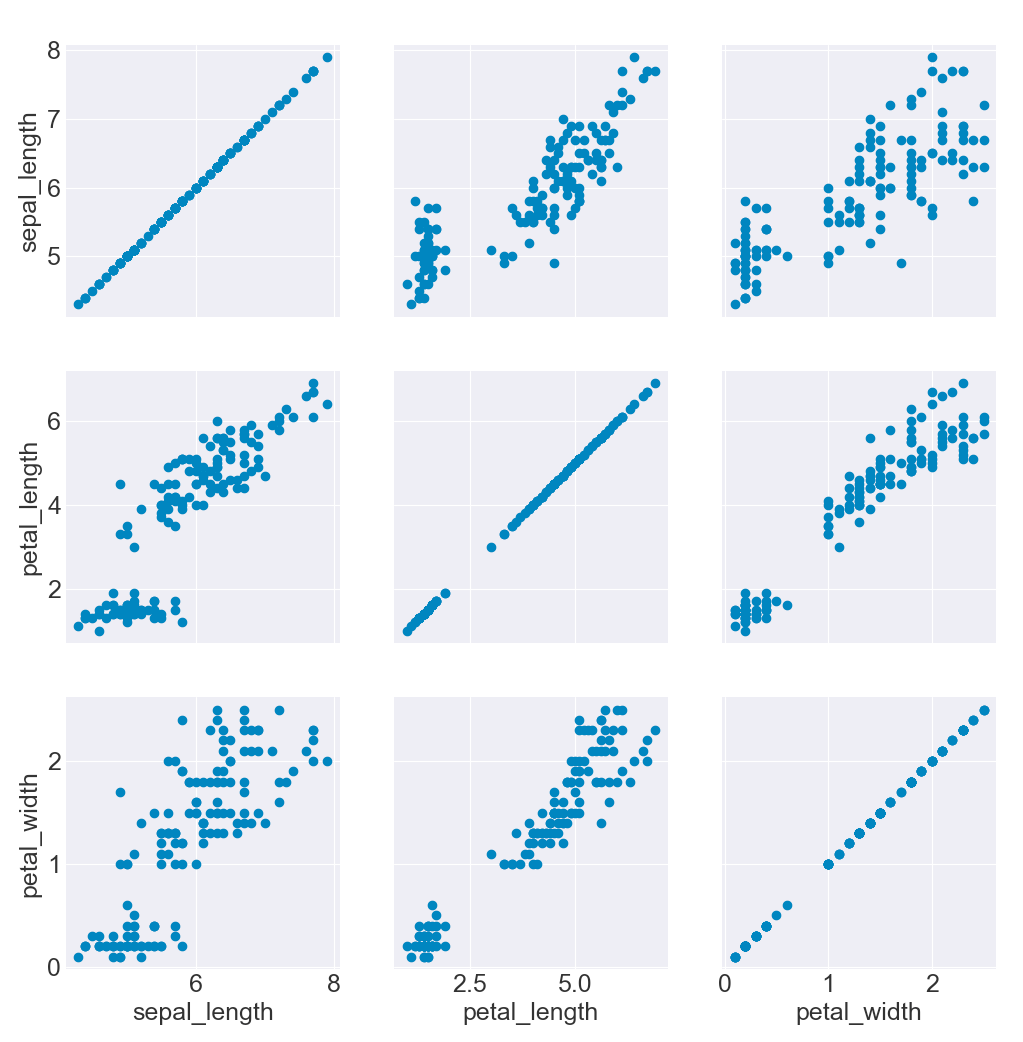

**Question 3:** How could you tell what type(s) of transformation to perform in order to recreate this figure?

**Answer 3:** Since the names of the required headers (features) are shown on both axes in the figure, it was fairly straightforward to project the orig_dataset of the transformation object onto these features.

### 3c) Implement methods that apply a single transformation

It can be convenient to have dedicated methods to apply a single transformation to projected data (without having to pass around matrices). Implement the following methods for this purpose:
- `translate`: Translates the variables `headers` in projected dataset in corresponding amounts specified by `magnitudes`.
- `scale`: Scales the variables `headers` in projected dataset in corresponding amounts specified by `magnitudes`.

#### Test `translate`

- Make a Transformation object with the Iris data
- Project onto the first 3 variables (`sepal_length`, `sepal_width`, `petal_length`).
- Translate x, y, and z by +1 unit each.
- Print out the 1st 5 samples of the result.

In [7]:
# Your test code here

# Task 3 - c

# Create a data and transformation object with the `iris_with_ints.csv` file.
data = Data('iris_with_ints.csv')
transformation = Transformation(orig_dataset=data)

# projet the data onto the first three headers.
transformation.project(['sepal_length', 'sepal_width', 'petal_length'])

# Translate the x, y, and z by +1 unit each
translated_data = transformation.translate([1, 1, 1])

# Print out the 1st 5 samples of the transformed data.
print(translated_data[:5])

[[6.1 4.5 2.4]
 [5.9 4.  2.4]
 [5.7 4.2 2.3]
 [5.6 4.1 2.5]
 [6.  4.6 2.4]]


**Your translate output should look like:**

    [[6.1 4.5 2.4]
     [5.9 4.  2.4]
     [5.7 4.2 2.3]
     [5.6 4.1 2.5]
     [6.  4.6 2.4]]

#### Test `scale`

- Make a Transformation object with the Iris data
- Project onto the first 3 variables (`sepal_length`, `sepal_width`, `petal_length`).
- Scale x, y, and z to 50% each.
- Print out the 1st 5 samples of the result.

In [8]:
# Your test code here

# Make a data and transformation object with the `iris_with_ints.csv` file.
data = Data('iris_with_ints.csv')
transformation = Transformation(orig_dataset=data)

# projet the data onto the first three headers [sepal_length, sepal_width, petal_length].
transformation.project(['sepal_length', 'sepal_width', 'petal_length'])

# Scale the x, y, and to 50% each
scaled_data = transformation.scale([0.5, 0.5, 0.5])

# Print out the 1st 5 samples of the transformed data.
print(scaled_data[:5])

[[2.55 1.75 0.7 ]
 [2.45 1.5  0.7 ]
 [2.35 1.6  0.65]
 [2.3  1.55 0.75]
 [2.5  1.8  0.7 ]]


**Your scale output should look like:**

    [[2.55 1.75 0.7 ]
     [2.45 1.5  0.7 ]
     [2.35 1.6  0.65]
     [2.3  1.55 0.75]
     [2.5  1.8  0.7 ]]

### 3d) Solve transformation mystery 2

- Make a Transformation object with the Iris data.
- Determine the set of variables to project onto then create/apply transformation matrix (or matrices) to recreate the image below.
- Create a scatter plot identical to the one below based on the projected/transformed data.

**NOTE:** Remember that `Transformation` inherits from `Analysis` so you have access to all those methods.

(array([-0.9, -1.1, -1.3, -1.4, -1. , -0.6, -1.4, -1. , -1.6, -1.1, -0.6,
        -1.2, -1.2, -1.7, -0.2, -0.3, -0.6, -0.9, -0.3, -0.9, -0.6, -0.9,
        -1.4, -0.9, -1.2, -1. , -1. , -0.8, -0.8, -1.3, -1.2, -0.6, -0.8,
        -0.5, -1.1, -1. , -0.5, -1.1, -1.6, -0.9, -1. , -1.5, -1.6, -1. ,
        -0.9, -1.2, -0.9, -1.4, -0.7, -1. ,  1. ,  0.4,  0.9, -0.5,  0.5,
        -0.3,  0.3, -1.1,  0.6, -0.8, -1. , -0.1,  0. ,  0.1, -0.4,  0.7,
        -0.4, -0.2,  0.2, -0.4, -0.1,  0.1,  0.3,  0.1,  0.4,  0.6,  0.8,
         0.7,  0. , -0.3, -0.5, -0.5, -0.2,  0. , -0.6,  0. ,  0.7,  0.3,
        -0.4, -0.5, -0.5,  0.1, -0.2, -1. , -0.4, -0.3, -0.3,  0.2, -0.9,
        -0.3,  0.3, -0.2,  1.1,  0.3,  0.5,  1.6, -1.1,  1.3,  0.7,  1.2,
         0.5,  0.4,  0.8, -0.3, -0.2,  0.4,  0.5,  1.7,  1.7,  0. ,  0.9,
        -0.4,  1.7,  0.3,  0.7,  1.2,  0.2,  0.1,  0.4,  1.2,  1.4,  1.9,
         0.4,  0.3,  0.1,  1.7,  0.3,  0.4,  0. ,  0.9,  0.7,  0.9, -0.2,
         0.8,  0.7,  0.7,  0.3,  0.5, 

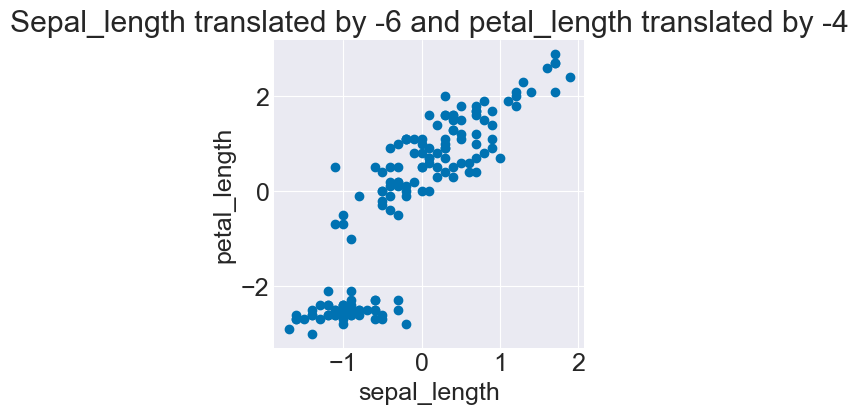

In [9]:
# Your code here

# Creating a transformation object with the iris_with_ints.csv file
transformation = Transformation(orig_dataset=data)

# Projecting the transformation object onto the headers sepal_length, petal_length
transformation.project(['sepal_length', 'petal_length'])

# Translating the data 
translated_data = transformation.translate([-6, -4])

# Creating a analysis object with the scaled_data
data_an = Analysis(transformation.data)

# Making a scatter plot of the scaled_data
data_an.scatter(ind_var='sepal_length', dep_var='petal_length', title = 'Sepal_length translated by -6 and petal_length translated by -4')

#### Your results should look like the image below.

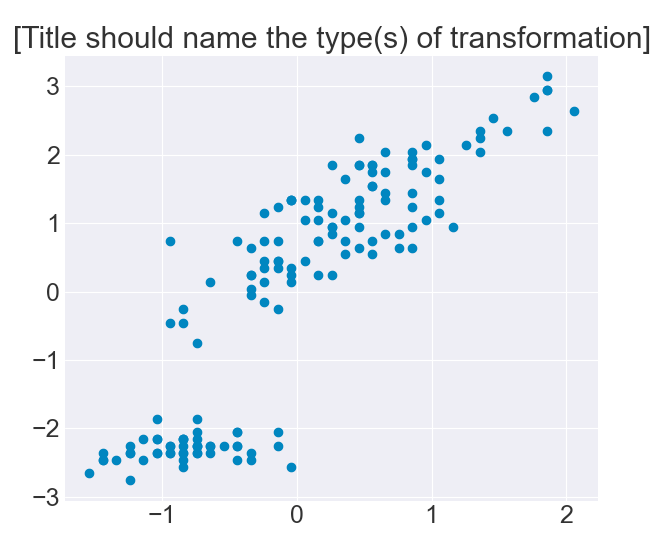

**Question 4:** How could you tell what type(s) of transformation to perform in order to recreate this figure?

**Answer 4:** 

I identified the general shape of the figure from a pair plot of the entire dataset, and was  able to determine the type(s) of transformation needed to recreate the figure by carefully examining the relationships between the variables in the pair plot.

Once I observed that the most similar shape of the figure (or general orientation which does not get changed by translation/scaling) was that of the petal_length vs sepal_length scatterplot, I proceeded to look at the original values of the scatterplot data points from the original dataset.

I then compared these values to the values of the provided mystery scatterplot, and after some comparative mathematics, I determined that the provided figure was produced when sepal_length is translated by -6 and petal_length is translated by -4.

### 3e) Solve transformation mystery 3

- Make a Transformation object with the Iris data.
- Determine the set of variables to project onto then create/apply transformation matrix (or matrices) to recreate the image below.
- Create a scatter plot identical to the one below based on the projected/transformed data. 

(array([1.53, 1.47, 1.41, 1.38, 1.5 , 1.62, 1.38, 1.5 , 1.32, 1.47, 1.62,
        1.44, 1.44, 1.29, 1.74, 1.71, 1.62, 1.53, 1.71, 1.53, 1.62, 1.53,
        1.38, 1.53, 1.44, 1.5 , 1.5 , 1.56, 1.56, 1.41, 1.44, 1.62, 1.56,
        1.65, 1.47, 1.5 , 1.65, 1.47, 1.32, 1.53, 1.5 , 1.35, 1.32, 1.5 ,
        1.53, 1.44, 1.53, 1.38, 1.59, 1.5 , 2.1 , 1.92, 2.07, 1.65, 1.95,
        1.71, 1.89, 1.47, 1.98, 1.56, 1.5 , 1.77, 1.8 , 1.83, 1.68, 2.01,
        1.68, 1.74, 1.86, 1.68, 1.77, 1.83, 1.89, 1.83, 1.92, 1.98, 2.04,
        2.01, 1.8 , 1.71, 1.65, 1.65, 1.74, 1.8 , 1.62, 1.8 , 2.01, 1.89,
        1.68, 1.65, 1.65, 1.83, 1.74, 1.5 , 1.68, 1.71, 1.71, 1.86, 1.53,
        1.71, 1.89, 1.74, 2.13, 1.89, 1.95, 2.28, 1.47, 2.19, 2.01, 2.16,
        1.95, 1.92, 2.04, 1.71, 1.74, 1.92, 1.95, 2.31, 2.31, 1.8 , 2.07,
        1.68, 2.31, 1.89, 2.01, 2.16, 1.86, 1.83, 1.92, 2.16, 2.22, 2.37,
        1.92, 1.89, 1.83, 2.31, 1.89, 1.92, 1.8 , 2.07, 2.01, 2.07, 1.74,
        2.04, 2.01, 2.01, 1.89, 1.95, 

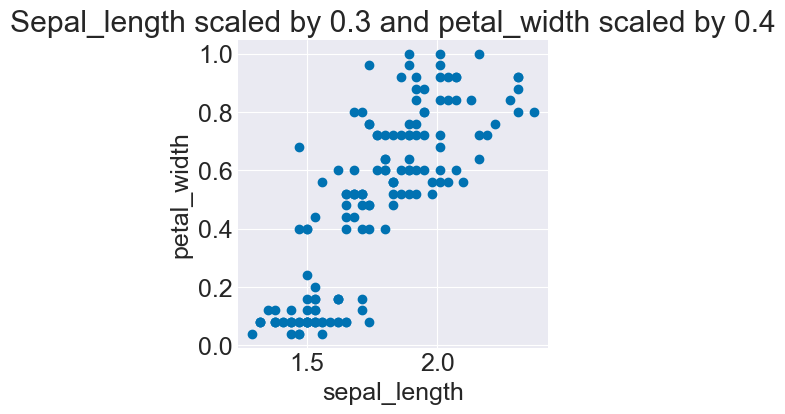

In [10]:
# Making a transformation object with the iris_with_ints.csv file
data = Data('iris_with_ints.csv')
transformation = Transformation(orig_dataset=data)

# Projecting the transformation object onto the headers sepal_length, petal_length
transformation.project(['sepal_length', 'petal_width'])

# Scaling the petal_width by 0.4 and sepal_length by 0.3
transformation.scale([0.3, 0.4])

# Creating a analysis object with the scaled_data
data_an = Analysis(transformation.data)

# Making a scatter plot of the scaled_data
data_an.scatter(ind_var='sepal_length', dep_var='petal_width', title = 'Sepal_length scaled by 0.3 and petal_width scaled by 0.4')



#### Your results should look like the plot below.

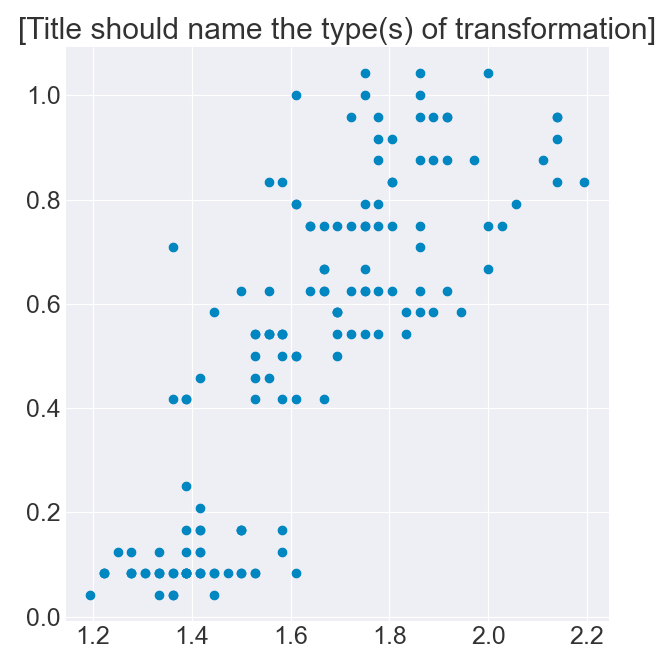

**Question 5:** How could you tell what type(s) of transformation to perform in order to recreate this figure?

**Answer 5:** 

I identified the general shape of the figure from a pair plot of the entire dataset, and was  able to determine the type(s) of transformation needed to recreate the figure by carefully examining the relationships between the variables in the pair plot.

Once I observed that the most similar shape of the figure (or general orientation which does not get changed by translation/scaling) was that of the petal_width vs sepal_length scatterplot, I proceeded to look at the original values of the scatterplot data points from the original dataset.

I then compared these values to the values of the provided mystery scatterplot, and after some comparative mathematics, I determined that the provided figure was produced when sepal_length is scaled by 0.3 and petal_width is scaled by 0.4.

## Task 4) Normalization

In this task, you will take advantage of your data transformation pipeline to normalize data in two ways:

1. All the variables together (entire matrix).
2. All the variables separately/independently.

### 4a) Applying compound transformations

Performing data normalization requires a sequence of matrix transformations. In cases like these, it can be convienent to create one compound transformation matrix `C` then multiply it once with the data matrix (instead of doing separate matrix multiplications for each transformation).

Before you start working on the normalization methods, implement the helper method `transform(C)` to transform the PROJECTED dataset by applying the homogeneous transformation matrix `C`.

#### Test `transform`: Perform the compound translation-scaling transformation to the projected data

* Create a Transformation object for the Iris dataset then project onto the first 3 variables: `sepal_length`, `sepal_width`, and `petal_length`.
* Create **and print** a compound transformation matrix `C` in the cell below from translation and scaling matrices that perform the following operations. Remember that order matters when building your compound transformation matrix and the data matrix will ultimately go on the right-hand side.
    - Create a translation matrix that would shift the projected data by -0.5 along `sepal_length` and +.5 along `petal_length`. 
    - Create a scaling matrix that would scale the projected data by 2 along `sepal_width` and 1/3 along `petal_length`.
- Use the `transform` method to apply it to the projected data. **Print the 1st 5 samples.**

In [11]:
# Your test code here

# Task 4 - a

# Create a data and transformation object with the `iris_with_ints.csv` file.
data = Data('iris_with_ints.csv')
transformation = Transformation(orig_dataset=data)

# projet the data onto the first three headers [sepal_length, sepal_width, petal_length].
transformation.project(['sepal_length', 'sepal_width', 'petal_length'])

# * Create **and print** a compound transformation matrix `C` in the cell below from translation and scaling matrices that perform the following operations. Remember that order matters when building your compound transformation matrix and the data matrix will ultimately go on the right-hand side.
#     - Create a translation matrix that would shift the projected data by -0.5 along `sepal_length` and +.5 along `petal_length`. 
#     - Create a scaling matrix that would scale the projected data by 2 along `sepal_width` and 1/3 along `petal_length`.

translation_matrix = transformation.translation_matrix([-0.5, 0, 0.5])
scale_matrix = transformation.scale_matrix([1, 2, 1/3])

C = np.matmul(translation_matrix, scale_matrix)

# Compound transformation matrix
print("Compound transformation matrix:")
print(C)

# - Use the `transform` method to apply it to the projected data. **Print the 1st 5 samples.**
data_transformed = transformation.transform(C)

print("Transformed data:")
print(data_transformed[:5])



Compound transformation matrix:
[[ 1.       0.       0.      -0.5    ]
 [ 0.       2.       0.       0.     ]
 [ 0.       0.       0.33333  0.5    ]
 [ 0.       0.       0.       1.     ]]
Transformed data:
[[4.6     7.      0.96667]
 [4.4     6.      0.96667]
 [4.2     6.4     0.93333]
 [4.1     6.2     1.     ]
 [4.5     7.2     0.96667]]


**Your output should look like:**


    Compound transformation matrix:
    [[ 1.       0.       0.      -0.5    ]
     [ 0.       2.       0.       0.     ]
     [ 0.       0.       0.33333  0.5    ]
     [ 0.       0.       0.       1.     ]]

    Transformed data:
    [[4.6     7.      0.96667]
     [4.4     6.      0.96667]
     [4.2     6.4     0.93333]
     [4.1     6.2     1.     ]
     [4.5     7.2     0.96667]]

### 4b) Normalize together

Implement `normalize_together` then test it below by following below steps:

- Make a Transformation object with the Iris data.
- Determine the set of variables to project onto to recreate the image below.
- Use a Transformation object to normalize each feature of the Iris dataset __together__.
- Create a pair plot identical to the one below based on the projected/transformed data. 

(<Figure size 1200x1200 with 25 Axes>,
 array([[<Axes: ylabel='sepal_length'>, <Axes: >, <Axes: >, <Axes: >,
         <Axes: >],
        [<Axes: ylabel='sepal_width'>, <Axes: >, <Axes: >, <Axes: >,
         <Axes: >],
        [<Axes: ylabel='petal_length'>, <Axes: >, <Axes: >, <Axes: >,
         <Axes: >],
        [<Axes: ylabel='petal_width'>, <Axes: >, <Axes: >, <Axes: >,
         <Axes: >],
        [<Axes: xlabel='sepal_length', ylabel='species'>,
         <Axes: xlabel='sepal_width'>, <Axes: xlabel='petal_length'>,
         <Axes: xlabel='petal_width'>, <Axes: xlabel='species'>]],
       dtype=object))

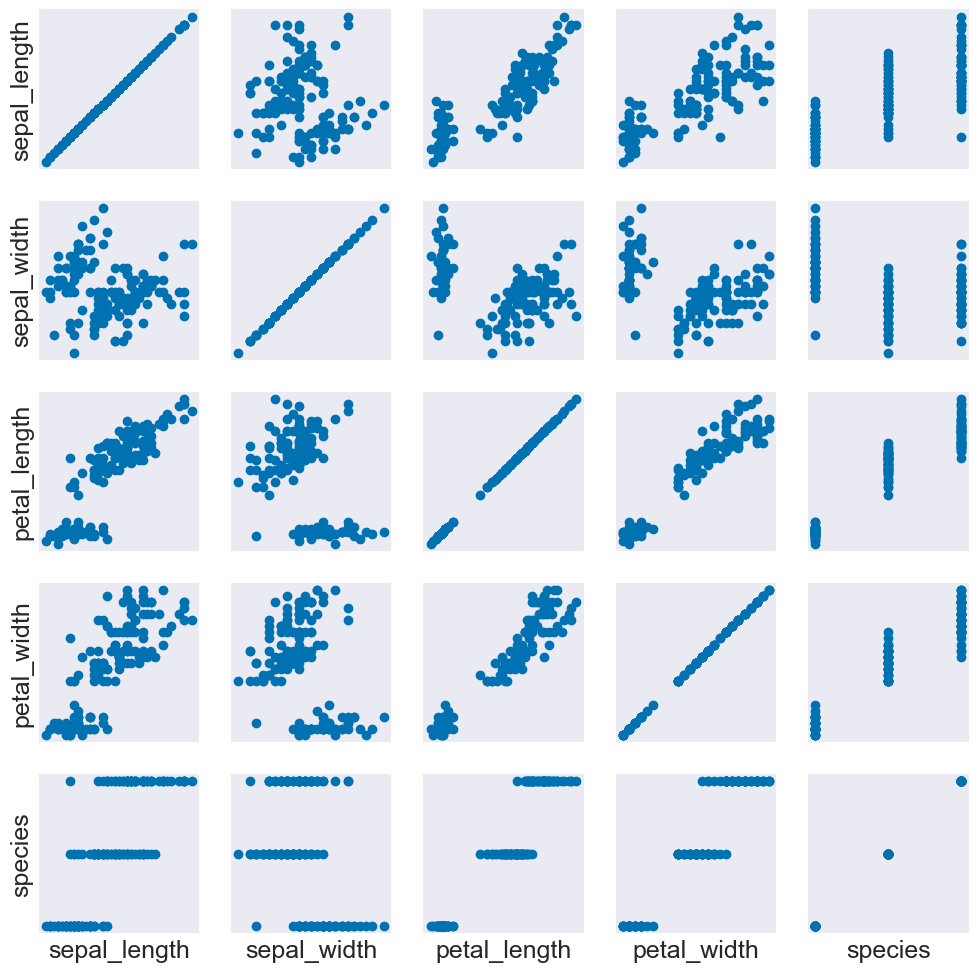

In [12]:
# Making a transformation object with the iris_with_ints.csv file
data = Data('iris_with_ints.csv')
transformation = Transformation(orig_dataset=data)

# Projecting the transformation object onto the headers sepal_length, sepal_width, petal_length, petal_width, species
transformation.project(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

# Use a Transformation object to normalize each feature of the Iris dataset __together__.
transformation.normalize_together()

# Creating an analysis object with the normalized data
data_an = Analysis(transformation.data)

# Making a pair plot of the normalized data
data_an.pair_plot(data_vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

#### Your results should look like the image below.

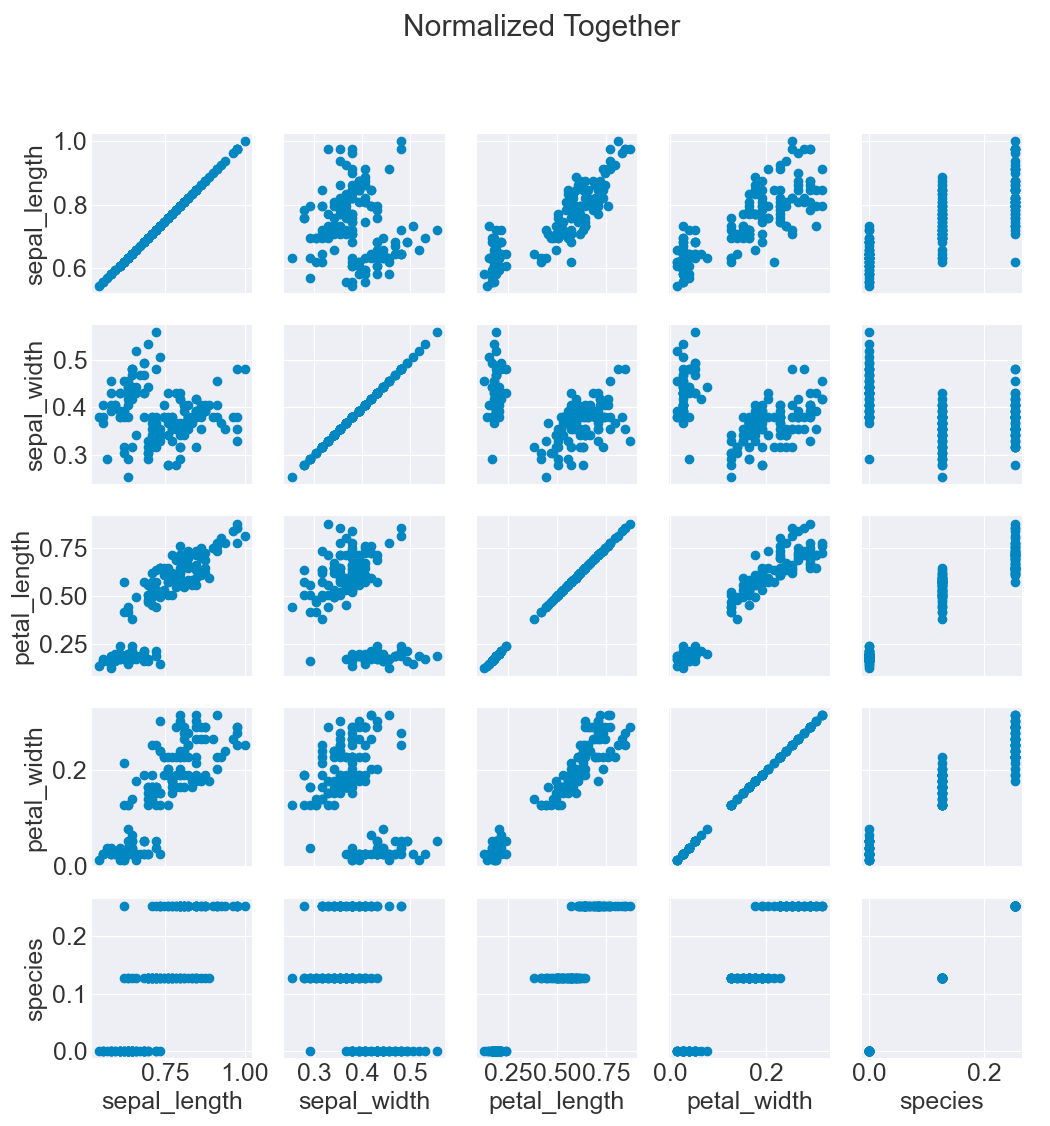

### 4c) Normalize Separately

Implement `normalize_separately` then test it below by following below steps:

- Make a Transformation object with the Iris data.
- Determine the set of variables to project onto to recreate the image below.
- Use a Transformation object to normalize each feature of the Iris dataset __separately__.
- Create a pair plot identical to the one below based on the projected/transformed data. 

(<Figure size 1200x1200 with 25 Axes>,
 array([[<Axes: ylabel='sepal_length'>, <Axes: >, <Axes: >, <Axes: >,
         <Axes: >],
        [<Axes: ylabel='sepal_width'>, <Axes: >, <Axes: >, <Axes: >,
         <Axes: >],
        [<Axes: ylabel='petal_length'>, <Axes: >, <Axes: >, <Axes: >,
         <Axes: >],
        [<Axes: ylabel='petal_width'>, <Axes: >, <Axes: >, <Axes: >,
         <Axes: >],
        [<Axes: xlabel='sepal_length', ylabel='species'>,
         <Axes: xlabel='sepal_width'>, <Axes: xlabel='petal_length'>,
         <Axes: xlabel='petal_width'>, <Axes: xlabel='species'>]],
       dtype=object))

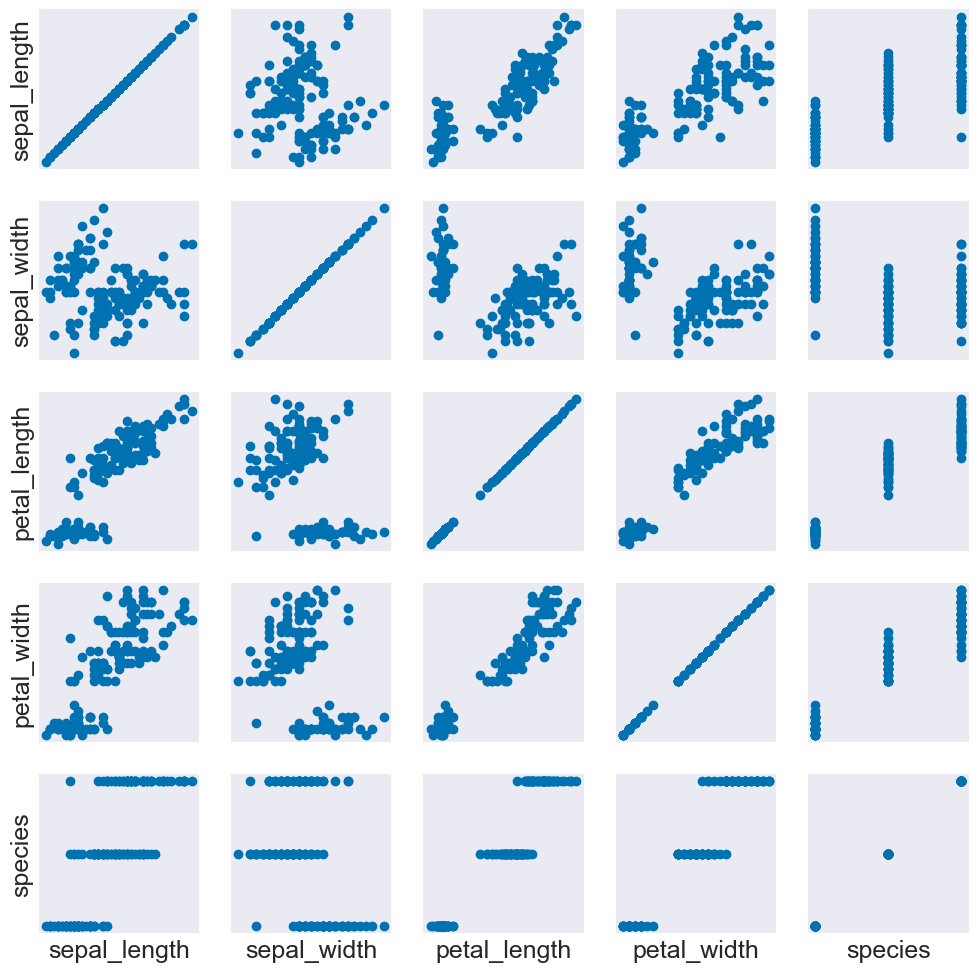

In [13]:
# Making a transformation object with the iris_with_ints.csv file
data = Data('iris_with_ints.csv')
transformation = Transformation(orig_dataset=data)

# Projecting the transformation object onto the headers sepal_length, sepal_width, petal_length, petal_width, species
transformation.project(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

# Use a Transformation object to normalize each feature of the Iris dataset __together__.
transformation.normalize_separately()

# Creating an analysis object with the normalized data
data_an = Analysis(transformation.data)

# Making a pair plot of the normalized data
data_an.pair_plot(data_vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

#### Your results should look like the image below.

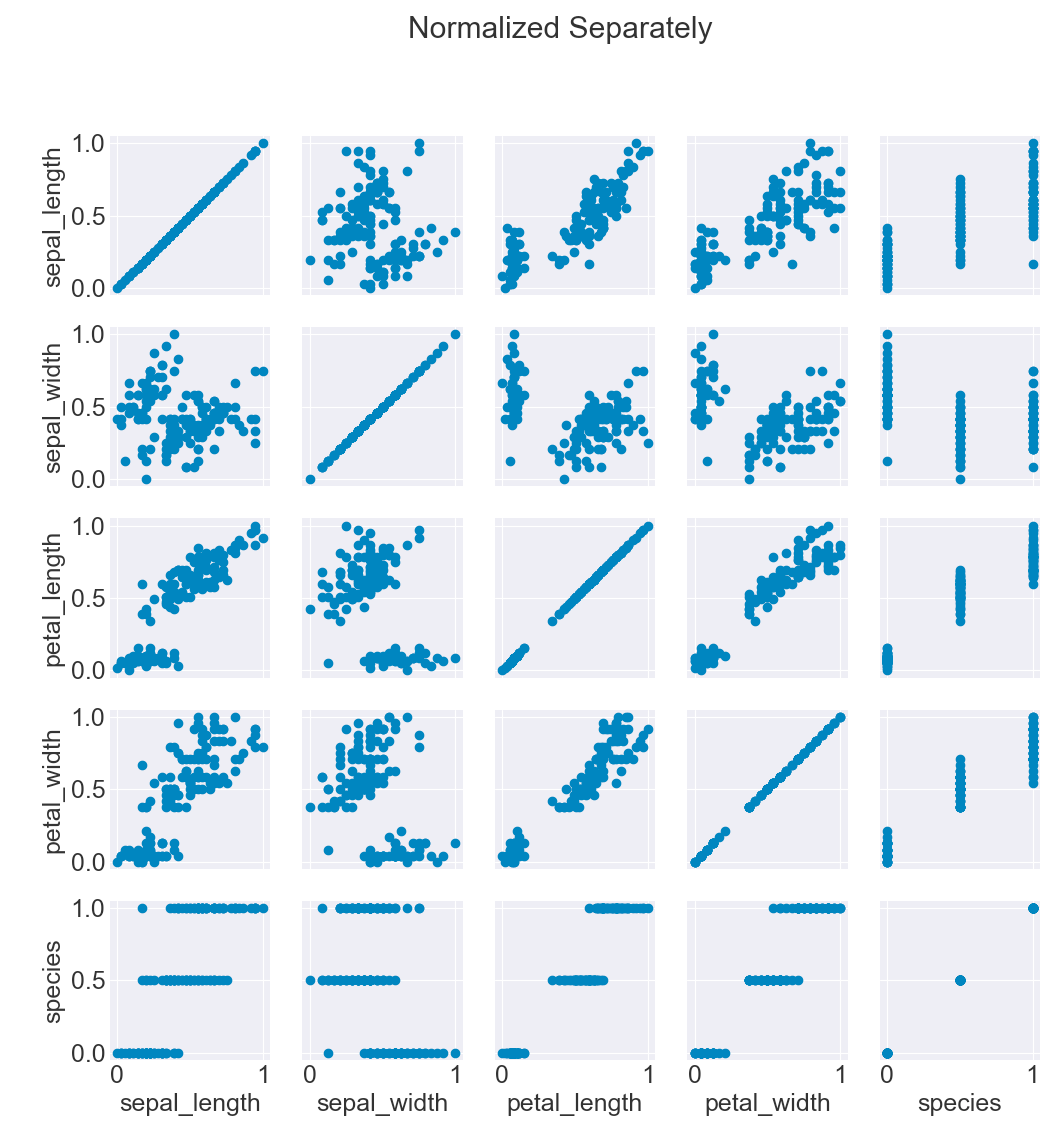

**Question 6:** What type(s) of transformation does normalization require, and in words, what is the meaning of the transformation matrix parameter values used?

**Answer 6:**

The type of transformation used in normalization is typically a linear transformation, where each value in the feature vector is multiplied by a scaling factor (i.e., the range of the new scale divided by the range of the original scale) and then shifted by an offset (i.e., the minimum value of the feature vector). This is often expressed as a matrix multiplication between the feature vector and a transformation matrix.

The transformation matrix used in normalization typically has a diagonal structure, with non-zero values on the diagonal and zeros elsewhere. The diagonal values correspond to the scaling factors for each feature, while the off-diagonal values are typically zero. The values of the diagonal are calculated based on the desired range of the new scale and the range of the original scale, while the offset value is calculated as the minimum value of the feature vector.

## Task 5) Mystery Letter Dataset

In this task your goal is to find the 3 capital letters hidden in a dataset with 3 variables (3D data). You will begin by implementating methods to create rotation matrices and apply rotation. This operation will play an important role in discovering and transforming the data to uncover these letters.

### Task 5a) Rotation matrices

Implement the following methods then fill in the cells below to test your code.

- `rotation_matrix_3d(header, degrees)`: Make an 3-D homogeneous rotation matrix for rotating the projected data about the ONE axis/variable `header`.
- `rotate_3d`: Rotates the projected data about the variable `header` by the angle (in degrees) `degrees`

#### Test (i): `rotation_matrix_3d`

- Make a Transformation object with the Iris data
- Project onto the first 3 variables (`sepal_length`, `sepal_width`, `petal_length`).
- Create a rotatation matrix that would rotate the Transformation object's projected data by 45 degrees about `petal_length`, and print the rotation matrix.

In [14]:
# Your test code here

**Your output should look like:**

    Rotation matrix:
    [[ 0.70711 -0.70711  0.       0.     ]
     [ 0.70711  0.70711  0.       0.     ]
     [ 0.       0.       1.       0.     ]
     [ 0.       0.       0.       1.     ]]

#### Test (ii): `rotate_3d`

- Using the same Transformation object created in the previous test, rotate about `sepal_length` 10 deg.
- Print out the 1st 5 samples of the result.

In [15]:
# Your test code here

**Your rotation output should look like:**

    [[5.1     3.20372 1.9865 ]
     [4.9     2.71132 1.89968]
     [4.7     2.92564 1.83592]
     [4.6     2.79243 2.01552]
     [5.      3.3022  2.00386]]

### Task 5b)  Mystery Letter Dataset

Your goal is to find the 3 capital letters hidden in `letter_data.csv` with 3 variables (3D data) and create single scatter plots showing each individual letter plotted right-side up. 
- Create Data and Transformation objects for the Letters dataset (`letter_data.csv`).
- Normalize the data seperately then apply transformations to find the hidden letters (scaling, translating and/or rotation).

**Hints:**
- Remember: Applying transformations changes the data stored in the `Transformation` object (i.e. the effects on the data compound). After searching for and identifying one letter, it might be helpful to start with the original data again. This can be achieved by re-projecting and normalizing.
- Visualize the data using `pair_plot` and/or `scatter` after applying a transformation.
- Downloading and running `scatter3d.py` from Terminal will produce an interactive 3D scatterplot. Feel free to use this tool to explore the data and inform your decisions about which transformations to use.

In [16]:
# Your code here

**Question 7:** Which letters did you find?  How could you tell what type(s) of transformations needed to be performed to find the letters?

**Answer 7:** 

## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

**Reminder:** Give credit to all sources, including anyone that you consulted.

### 1. Explore additional visualizations

- Implement a scatter plot version that uses the marker size aesthetic to visualize another dimension of data (up to 4D).
- Implement a scatter plot version that uses both color and marker size aesthetics (up to 5D).

### 2. Perform different matrix transformations on data

- Normalize by Z-score rather than min/max.
- "Whiten" a dataset.
- Implement normalize together and separately using numpy vectorization/broadcasting. Compare the approaches in efficiency (time and compare the two implementations).

### 3. Implement and use 2D rotation

### 4. Apply matrix transformations and visualization a dataset of your choice